In [1]:
%pylab
%load_ext autoreload
%autoreload 2

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
from metric import tests
import cv2
from utils import wand_transforms
import wand
from wand.image import Image
from metric.separate_iou import siou
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import tqdm
import seaborn as sns

In [3]:
%matplotlib inline

In [145]:
circs = tests.uniform_random_circles(25, 55, 450, 10, 50, 5)
slices = np.zeros((25, 512, 512), np.uint8)
image = np.zeros((512, 512), np.uint8)
for j, (c, r) in enumerate(circs):
    slices[j] = cv2.circle(slices[j], c, r, 1, -1)
    image = cv2.circle(image, c, r, 1, -1)
random_target = np.random.rand(*image.shape)
p = image.sum()/image.size
print(p)
random_target = (random_target < .50).astype(np.uint8)

orig = image
img = random_target
_, x = cv2.connectedComponents(orig, connectivity=8)
_, y = cv2.connectedComponents(img, connectivity=8)

idx = (orig != 0) | (y != 0)
print(adjusted_rand_score(x[idx].reshape(-1), y[idx].reshape(-1)))

0.21251296997070312
0.4383932059198155


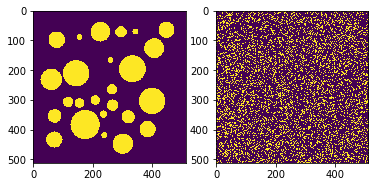

In [131]:
subplot(1, 2, 1)
imshow(orig)
subplot(1, 2, 2)
imshow(img)

In [146]:
orig1 = orig*255
orig1[orig1 == 0] = 127
orig1[~idx] = 0

In [147]:
len(np.unique(y[idx]))

882